In [903]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Read the data as an appropriate Time Series data and plot the data.

In [909]:
df_rose=pd.read_csv('Rose (1).csv')

In [910]:
df_rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [911]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [912]:
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [913]:
df_rose.set_index(keys='Time_Stamp',drop=True,inplace=True)
df_rose.drop('YearMonth',axis=1, inplace=True)
df_rose.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [31]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [499]:
print("The number of rows: ",df_rose.shape[0], "\n""The number of columns: ",df_rose.shape[1])

The number of rows:  187 
The number of columns:  1


In [914]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [915]:
#Imputing the missing value using linear Interpolate function
df_rose=df_rose.interpolate()

In [916]:
df_rose.isnull().sum()

Rose    0
dtype: int64

In [962]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


### Plot the Time Series to understand the behaviour of the data

In [920]:
from pylab import rcParams

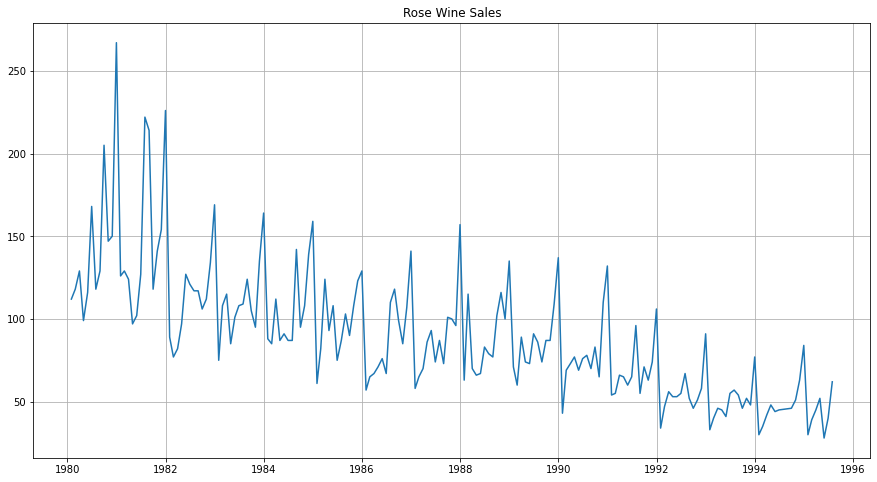

In [917]:

#rcParams['figure.figsize'] = 15,8
plt.figure(figsize=(15,8))
plt.grid();
plt.plot(df_rose)
plt.title('Rose Wine Sales')
plt.show()

In [963]:
df_rose.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [39]:
df_rose.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='Time_Stamp', length=187)

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

Box plot year wise

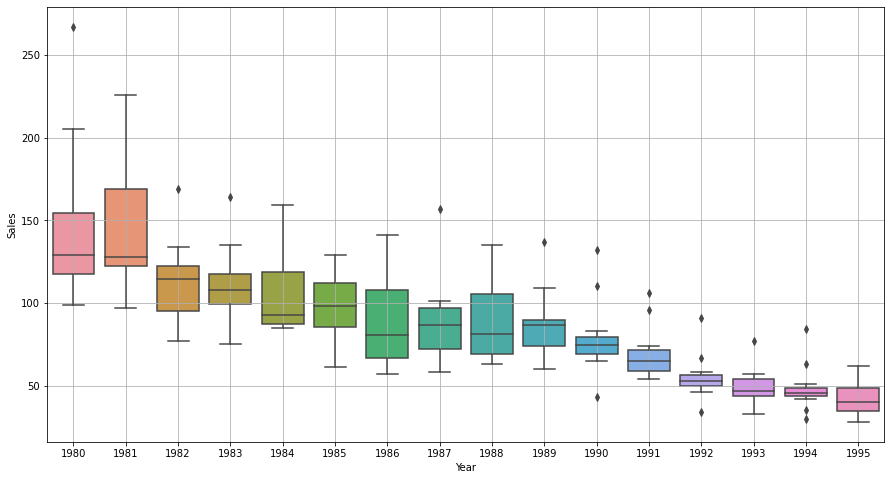

In [57]:
sns.boxplot(df_rose.index.year , df_rose['Rose'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Box plot Monthly

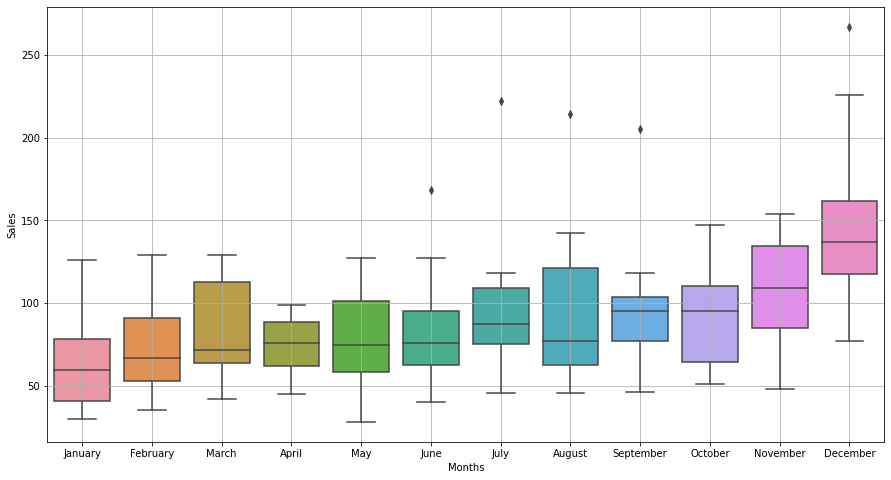

In [46]:
sns.boxplot(df_rose.index.month_name() , df_rose['Rose'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [47]:
from statsmodels.graphics.tsaplots import month_plot

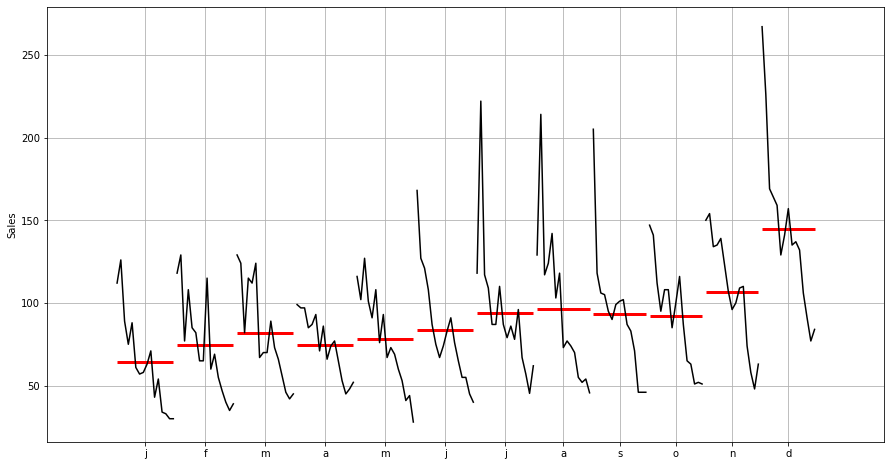

In [48]:
month_plot(df_rose['Rose'],ylabel='Sales')
plt.grid();

In [49]:
yearly_sales_across_month=pd.pivot_table(df_rose,values='Rose',columns=df_rose.index.month, index=df_rose.index.year)
yearly_sales_across_month

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


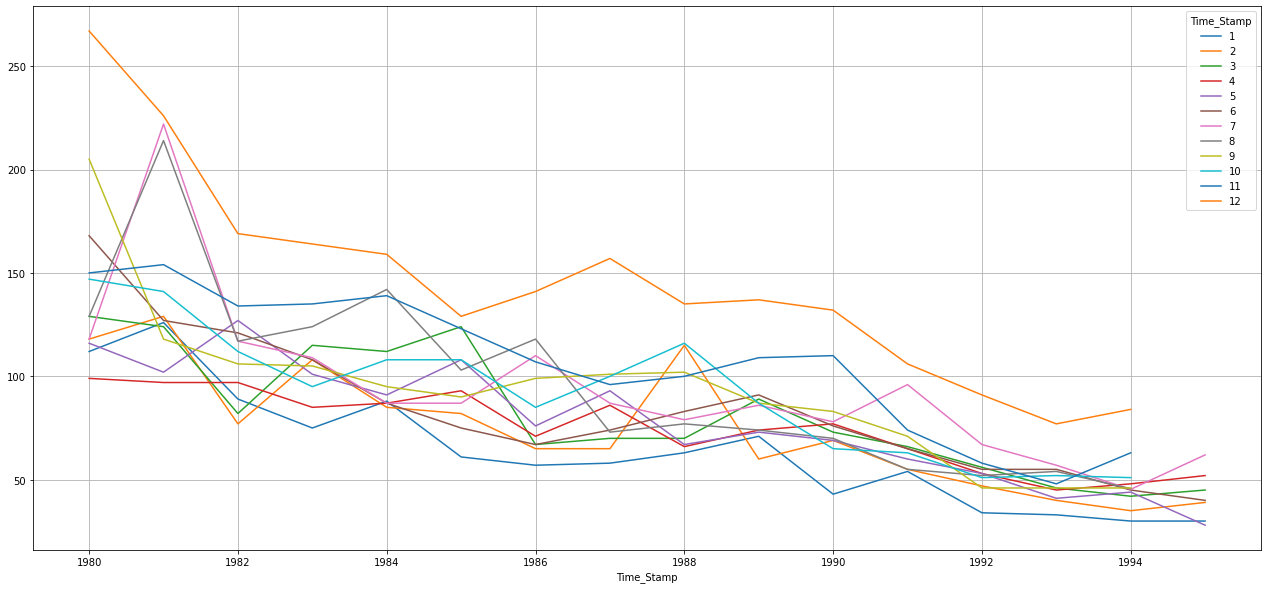

In [50]:
fig, ax = plt.subplots(figsize=(22,10))

yearly_sales_across_month.plot(ax=ax)
plt.grid()
plt.show()

Yearly Plot

In [918]:
df_roseyearly_sum=df_rose.resample('A').sum()
df_roseyearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


Text(0.5, 0, 'Sum of observation at each year')

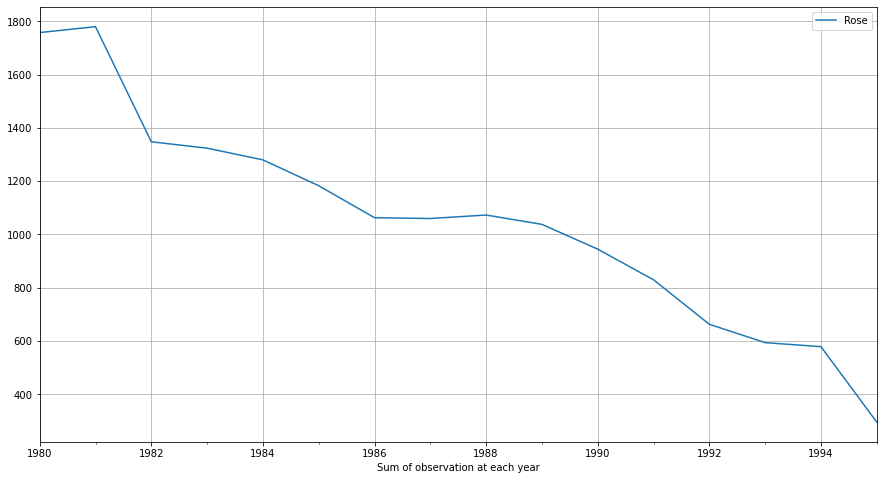

In [919]:

df_roseyearly_sum.plot()
plt.grid()
plt.xlabel('Sum of observation at each year')

Quarterly Plot

In [67]:
df_rosequartely_sum=df_rose.resample('Q').sum()
df_rosequartely_sum.head()

,Rose
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


Text(0.5, 0, 'Sum of Quartely values')

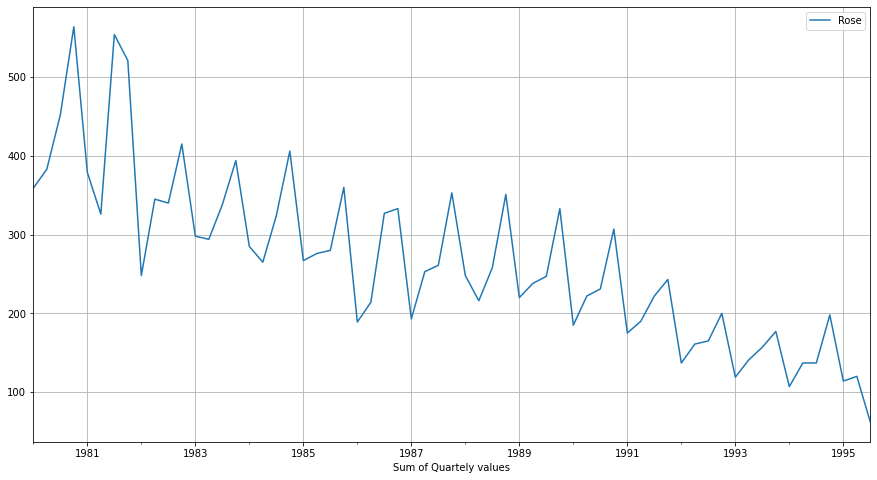

In [64]:

df_rosequartely_sum.plot()
plt.grid()
plt.xlabel('Sum of Quartely values')

Daily Plot

In [69]:
df_rosedaily_sum=df_rose.resample('D').sum()
df_rosedaily_sum

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


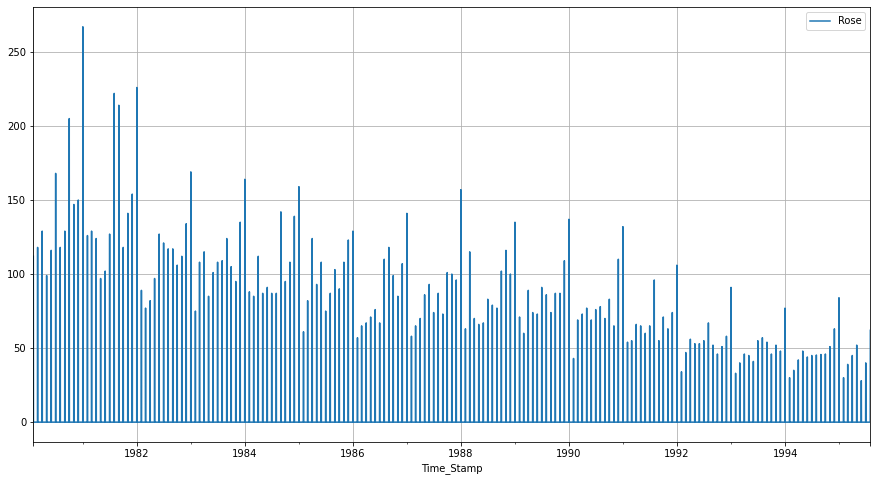

In [70]:
df_rosedaily_sum.plot()
plt.grid()

### Plot the Empirical Cumulative Distribution

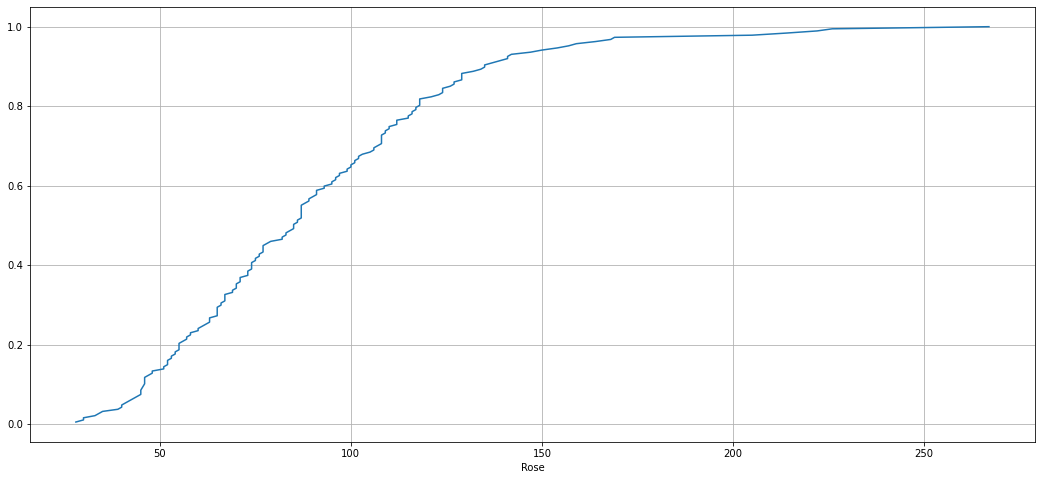

In [372]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

### Plot the average Sales per month and the month on month percentage change of Sales

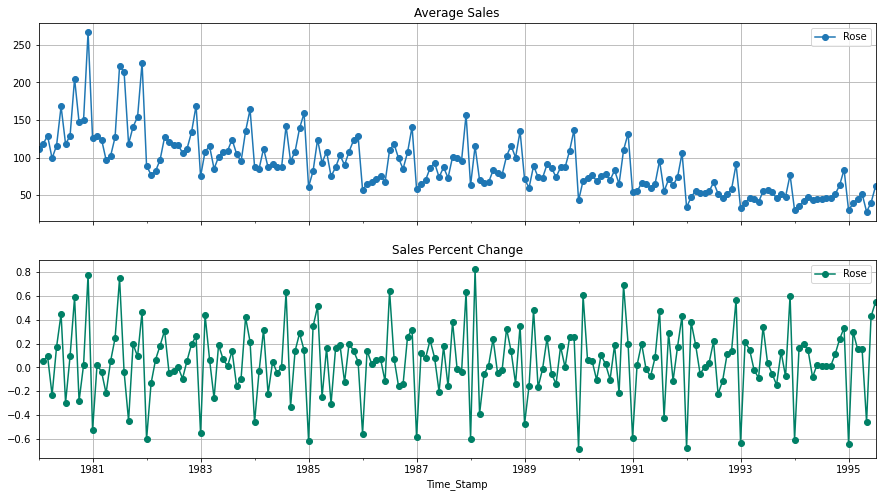

In [374]:
# group by date and get average RetailSales, and precent change
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

### Decompose the Time Series

Additive Model

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

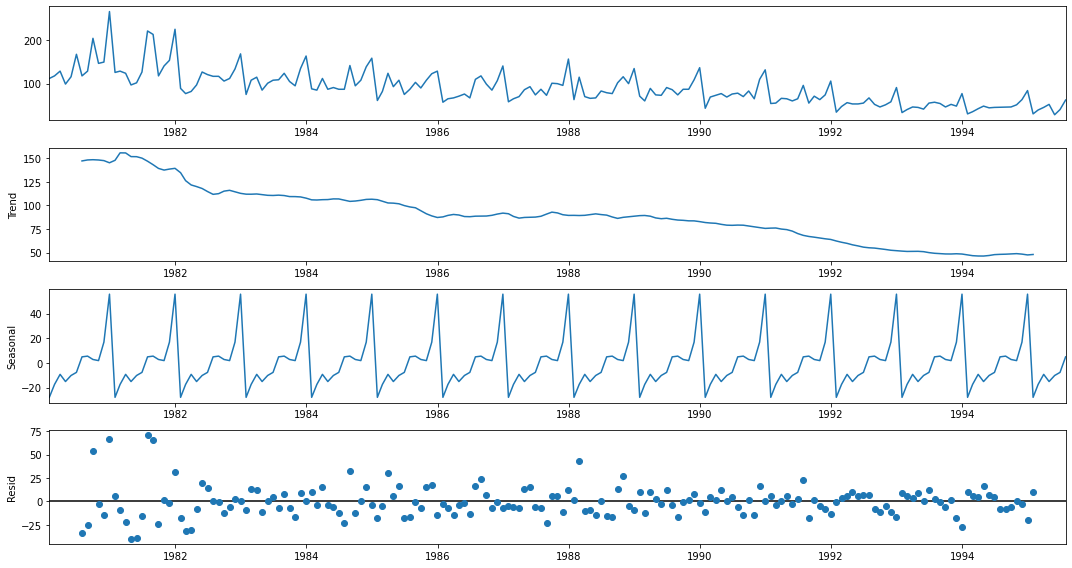

In [76]:
decomposition = seasonal_decompose(df_rose,model='additive')
decomposition.plot();

In [77]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [367]:
seasonality[7]+trend[7]+residual[7]

129.0

In [375]:
print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
Name: resid, dtype: float64 



Multiplicative Model

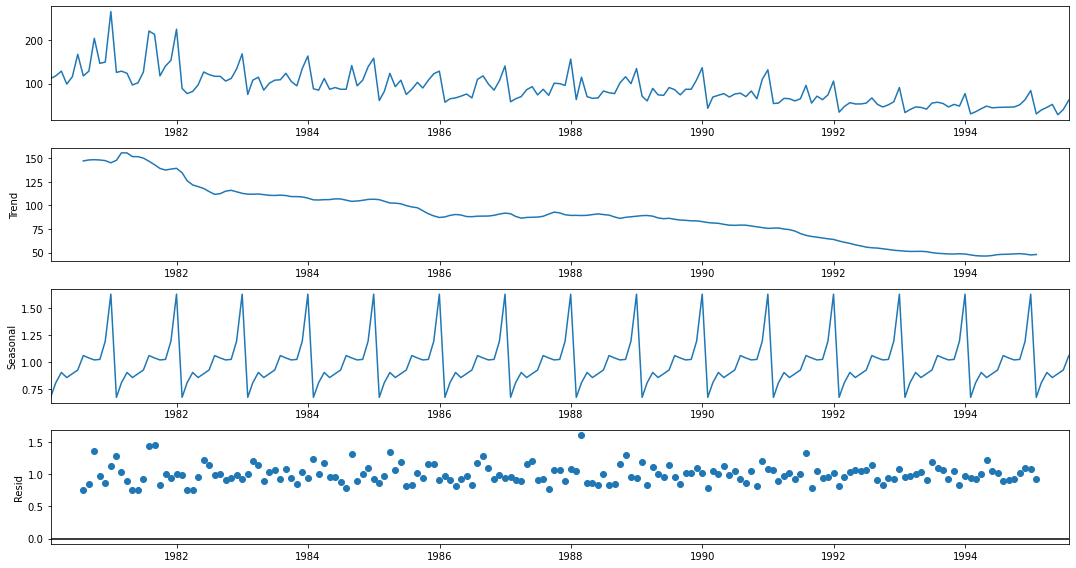

In [80]:
decomposition_m = seasonal_decompose(df_rose,model='multiplicative')
decomposition_m.plot();

In [81]:
trend_m = decomposition_m.trend
seasonality_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

In [366]:
seasonality_m[7]*trend_m[7]*residual_m[7]

129.0

In [376]:
print('Trend','\n',trend_m.head(10),'\n')
print('Seasonality','\n',seasonality_m.head(10),'\n')
print('Residual','\n',residual_m.head(10),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
Name: resid, dtype: float64 



### 3. Split the data into training and test. The test data should start in 1991.

In [787]:
train = df_rose[df_rose.index<'1991'] 
test = df_rose[df_rose.index>='1991']

In [84]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [85]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


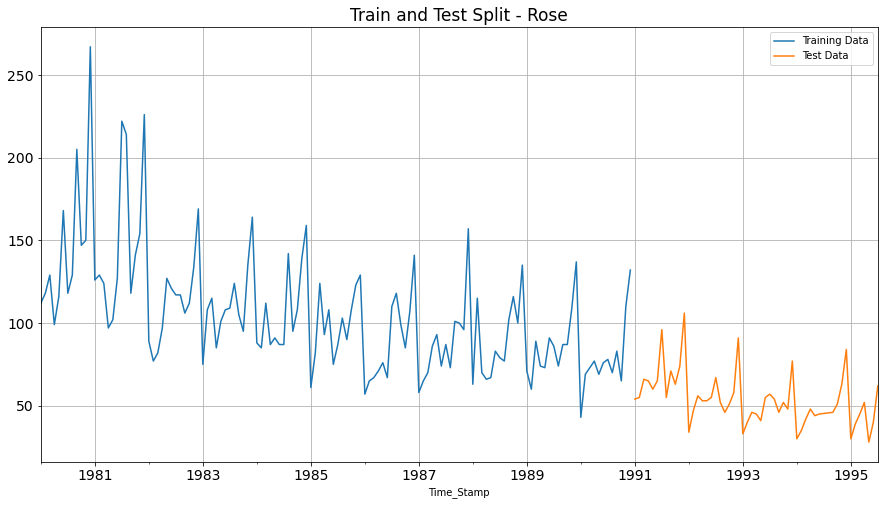

In [290]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Train and Test Split - Rose', fontsize=17)
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1:Linear Regression

In [608]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [788]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [789]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [790]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
Time_Stamp,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
Time_Stamp,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data


,Rose,time
Time_Stamp,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


In [791]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [792]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

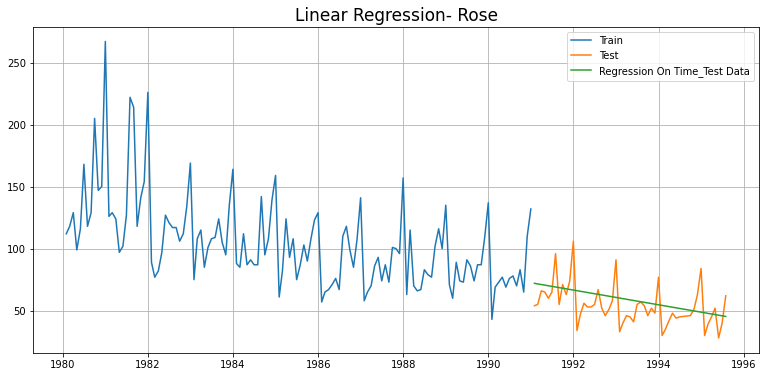

In [614]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression- Rose', fontsize=17)
plt.grid();

Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [793]:
from sklearn import metrics

In [794]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [795]:
resultsDf = pd.DataFrame({'Test RMSE': round(rmse_model1_test,3)},index=['RegressionOnTime'])
resultsDf


,Test RMSE
RegressionOnTime,15.269


## Model 2: Naive Approach

In [796]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [797]:
NaiveModel_train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [798]:
NaiveModel_test['naive'] = NaiveModel_train['Rose'][len(NaiveModel_train)-1]
NaiveModel_test[['Rose','naive']].head()

,Rose,naive
Time_Stamp,,
1991-01-31,54.0,132.0
1991-02-28,55.0,132.0
1991-03-31,66.0,132.0
1991-04-30,65.0,132.0
1991-05-31,60.0,132.0


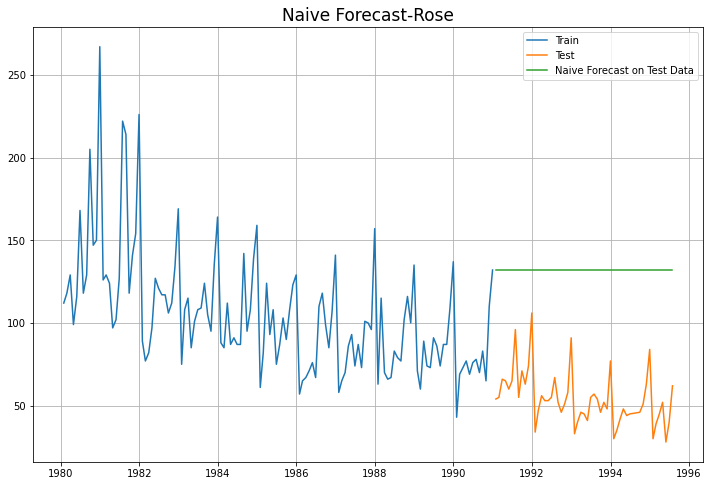

In [522]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast-Rose",fontsize=17)
plt.grid();

Model Evaluation

In [799]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive model forecast on the Test Data,  RMSE is 79.719


In [800]:
resultsDf2 = pd.DataFrame({'Test RMSE': round(rmse_model2_test,3)},index=['NaiveModel'])
resultsDf2

,Test RMSE
NaiveModel,79.719


In [801]:

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719


### Model 3: Simple Average

In [802]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [901]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
round(SimpleAverage_test.head(),3)

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939
1991-02-28,55.0,104.939
1991-03-31,66.0,104.939
1991-04-30,65.0,104.939
1991-05-31,60.0,104.939


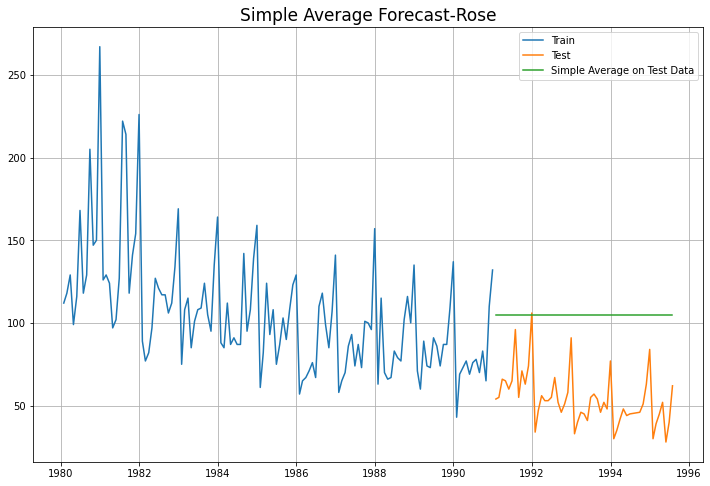

In [221]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast-Rose",fontsize=17)
plt.grid();

Model Evaluation

In [804]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [805]:
resultsDf3 = pd.DataFrame({'Test RMSE': round(rmse_model3_test,3)}
                           ,index=['SimpleAverageModel'])
resultsDf3

,Test RMSE
SimpleAverageModel,53.461


In [806]:
resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461


### Model 4: Moving Average(MA)

In [807]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [921]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


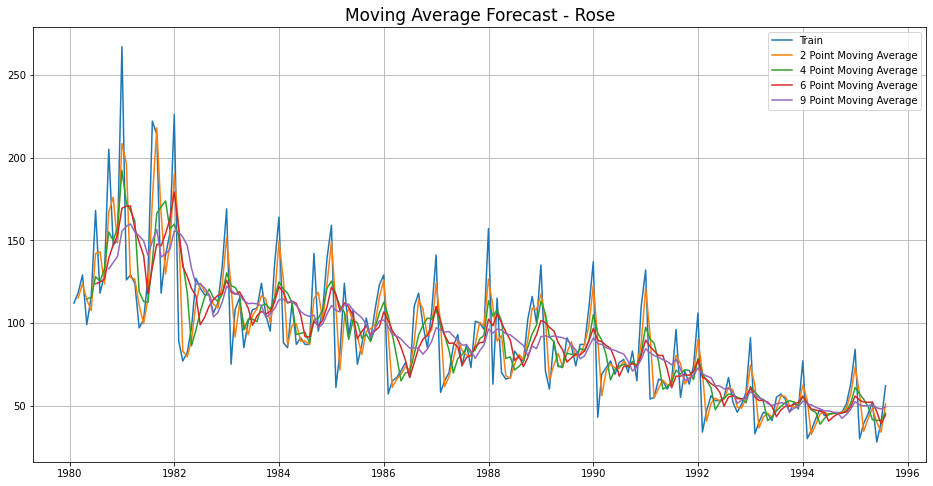

In [536]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [809]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

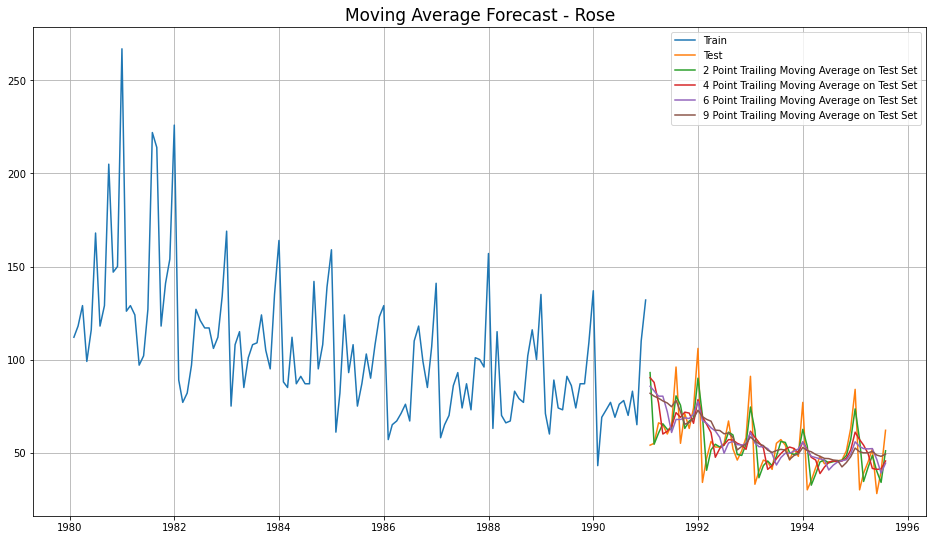

In [538]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);

Model Evaluation

Done only on the test data

In [810]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [811]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
round(resultsDf4,3)

,Test RMSE
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728


In [812]:

resultsDf = pd.concat([resultsDf, round(resultsDf4,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

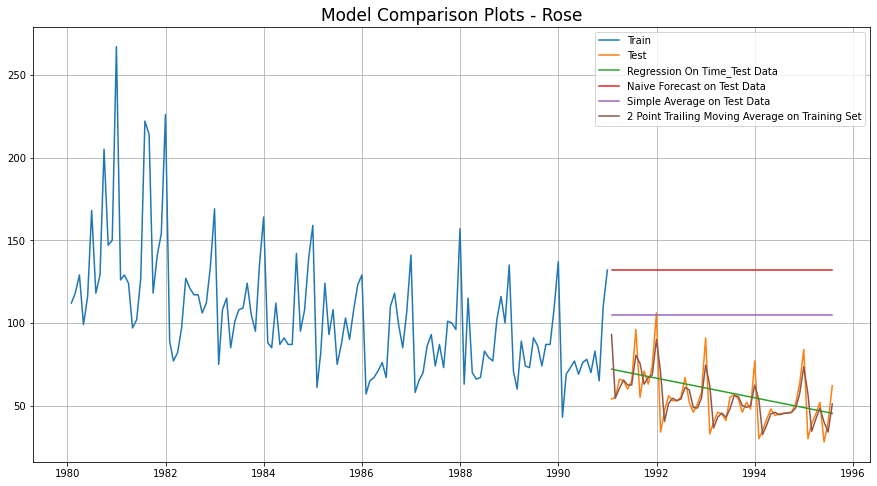

In [542]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose",fontsize=17)
plt.grid();

### Model 5: Simple Exponential Smoothing

In [813]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [814]:
SES_train = train.copy()
SES_test = test.copy()

In [815]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)

In [816]:
model_SES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.098750,True
initial_level,l.0,134.387023,True


In [817]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104999
1991-02-28,55.0,87.104999
1991-03-31,66.0,87.104999
1991-04-30,65.0,87.104999
1991-05-31,60.0,87.104999


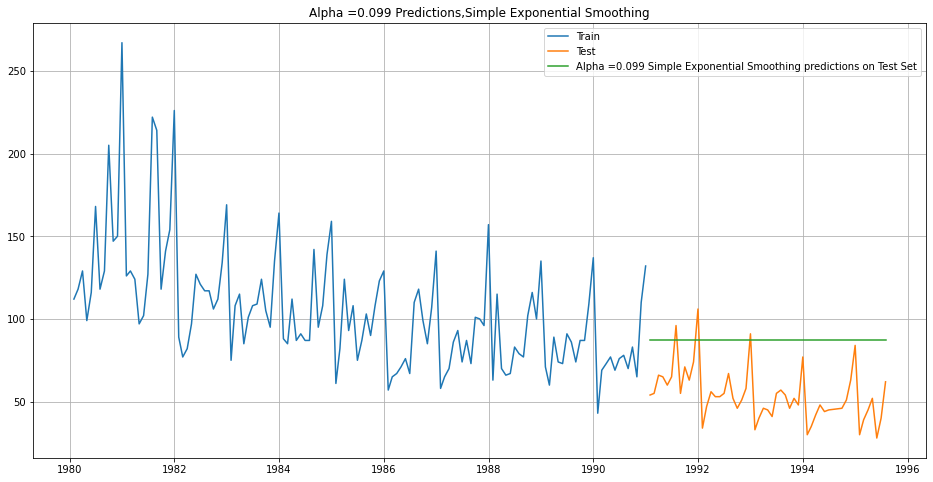

In [818]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.099 Predictions,Simple Exponential Smoothing');

Model Evaluation for  𝛼  = 0.099 : Simple Exponential Smoothing

In [819]:
## Test Data

rmse_model5_test = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test))

For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [820]:
resultsDf5 = pd.DataFrame({'Test RMSE': round(rmse_model5_test,3)}
                              ,index=['Alpha=0.099:SimpleExponentialSmoothing'])
resultsDf5

,Test RMSE
Alpha=0.099:SimpleExponentialSmoothing,36.796


In [821]:

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796


### Model 6: Simple Exponential Smoothing(𝛼 = 0.1)

Setting different alpha values.

In [822]:
resultsDf_m = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_m

,Alpha Values,Test RMSE


In [823]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model7_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model7_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_m = resultsDf_m.append({'Alpha Values':i,'Train RMSE':rmse_model7_train_i 
                                      ,'Test RMSE':rmse_model7_test_i}, ignore_index=True)

In [824]:
resultsDf_m.sort_values(by='Test RMSE',ascending=True)

,Alpha Values,Test RMSE,Train RMSE
0,0.1,36.828033,31.815610
1,0.2,41.361876,31.979391
2,0.3,47.504821,32.470164
3,0.4,53.767406,33.035130
4,0.5,59.641786,33.682839
5,0.6,64.971288,34.441171
6,0.7,69.698162,35.323261
7,0.8,73.773992,36.334596
8,0.9,77.139276,37.482782


In [559]:
SES_test.head()

,Rose,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
Time_Stamp,,,,,,,,,,,
1991-01-31,54.0,87.104999,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-02-28,55.0,87.104999,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-03-31,66.0,87.104999,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-04-30,65.0,87.104999,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-05-31,60.0,87.104999,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777


In [825]:
temp_resultsDf_ses = pd.DataFrame({'Test RMSE': [resultsDf_m.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

round(temp_resultsDf_ses,3)

,Test RMSE
"Alpha=0.1,SimpleExponentialSmoothing",36.828


In [826]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_ses,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828


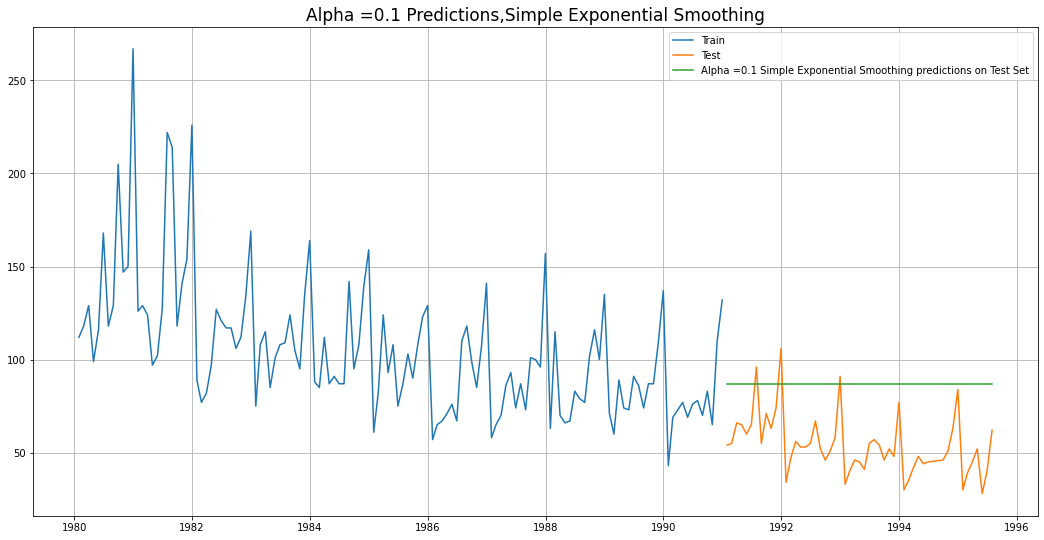

In [922]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

#plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.title('Alpha =0.1 Predictions,Simple Exponential Smoothing',fontsize=17);
plt.grid();

### Model 7: Double Exponential Smoothing (Holt's Model)

In [924]:
DES_train = train.copy()
DES_test = test.copy()

In [925]:
model_DES = Holt(DES_train['Rose'])
model_DES_autofit = model_DES.fit(optimized=True)

In [926]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,1.321340e-04,True
smoothing_trend,beta,1.051388e-16,True
initial_level,l.0,1.362244e+02,True
initial_trend,b.0,-4.786758e-01,True


In [928]:
DES_test['auto_predict']= model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,72.569944
1991-02-28,55.0,72.091268
1991-03-31,66.0,71.612593
1991-04-30,65.0,71.133917
1991-05-31,60.0,70.655241


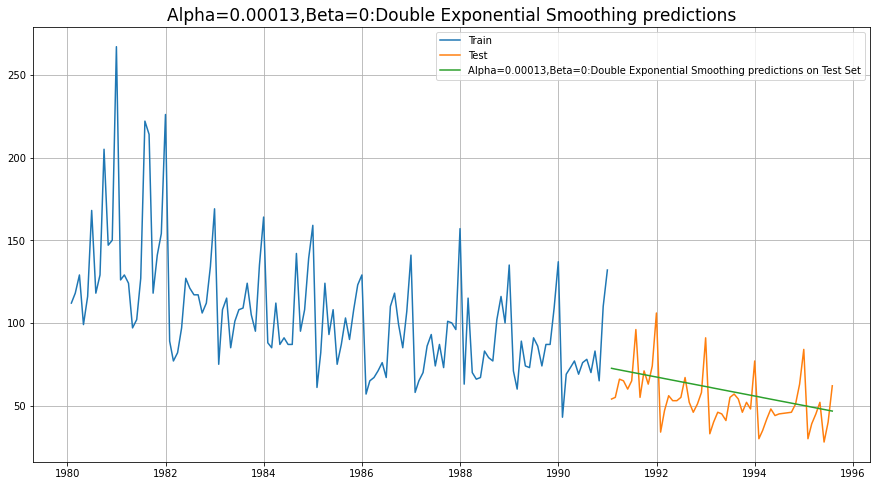

In [929]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['auto_predict'], label='Alpha=0.00013,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.00013,Beta=0:Double Exponential Smoothing predictions', fontsize=17);

In [832]:
## Test Data - RMSE

rmse_model6_test = metrics.mean_squared_error(test['Rose'],DES_test['auto_predict'],squared=False)
print("For Alpha=0.00013,Beta=0:Double Exponential Smoothing predictions forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Alpha=0.00013,Beta=0:Double Exponential Smoothing predictions forecast on the Test Data,  RMSE is 15.569


In [833]:
resultsDf6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]}
                              ,index=['Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing'])

round(resultsDf6,3)

,Test RMSE
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


In [834]:
resultsDf = pd.concat([resultsDf, round(resultsDf6,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### Model 8: Double Exponential Smoothing (Holt's Model) (with 𝛼 =0.1, 𝛽 =0.1)

Setting different alpha values.

In [942]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_m1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_m1

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [943]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model8_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_m1 = resultsDf_m1.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                          ,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [944]:
resultsDf_m1.sort_values(by='Test RMSE',ascending=True).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.923416
1,0.1,0.2,33.450729,48.688648
9,0.2,0.1,33.097427,65.731702
2,0.1,0.3,33.145789,78.156641
18,0.3,0.1,33.611269,98.653317


In [940]:
temp_resultsDf_des = pd.DataFrame({'Test RMSE': [resultsDf_m1.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing'])

round(temp_resultsDf_des,3)

,Test RMSE
"Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing",36.923


In [839]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_des,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


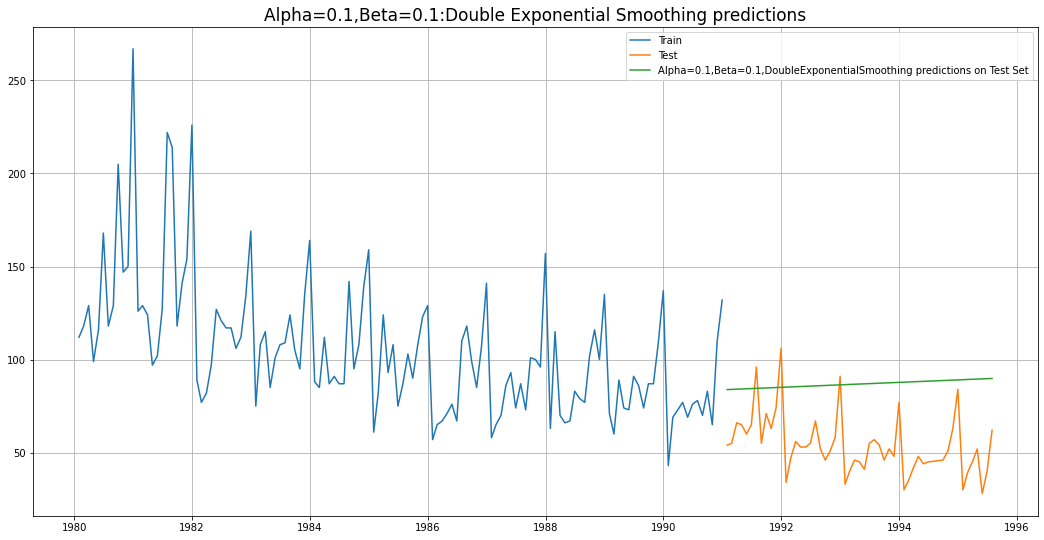

In [945]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

#plt.plot(DES_predict, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Alpha=0.1,Beta=0.1:Double Exponential Smoothing predictions', fontsize=17);

### Model 9: Triple Exponential Smoothing (Holt - Winter's Model)

In [932]:
TES_train = train.copy()
TES_test = test.copy()

In [933]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [934]:
model_TES_autofit = model_TES.fit(optimized=True)

In [935]:
model_TES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.064672,True
smoothing_trend,beta,0.053159,True
smoothing_seasonal,gamma,0.000000,True
initial_level,l.0,50.880913,True
initial_trend,b.0,-0.316568,True
initial_seasons.0,s.0,2.215837,True
initial_seasons.1,s.1,2.514395,True
initial_seasons.2,s.2,2.746930,True
initial_seasons.3,s.3,2.401184,True
initial_seasons.4,s.4,2.699363,True


In [936]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.755640
1991-02-28,55.0,64.211013
1991-03-31,66.0,69.939833
1991-04-30,65.0,60.953618
1991-05-31,60.0,68.316934


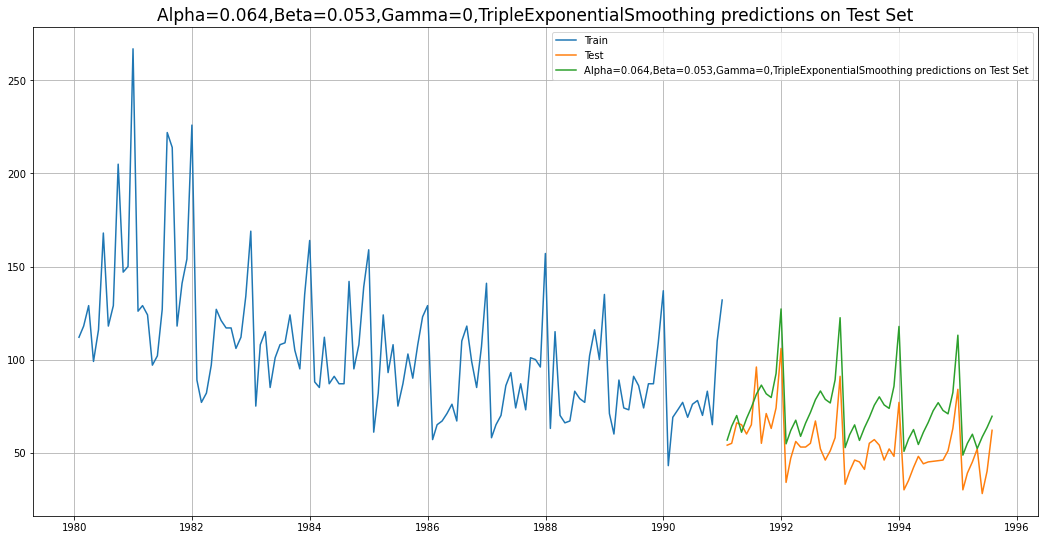

In [946]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing predictions on Test Set', fontsize=17);

In [851]:
## Test Data - RMSE

rmse_model7_test = metrics.mean_squared_error(test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing predictions forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing predictions forecast on the Test Data,  RMSE is 21.155


In [852]:
temp_resultsDf7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]}
                              ,index=['Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing'])

round(temp_resultsDf7,3)

,Test RMSE
"Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing",21.155


In [853]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf7,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### Model 10: Triple Exponential Smoothing (Holt - Winter's Model) (𝛼 =0.1 , 𝛽 =0.2 & 𝛾=0.2)

In [948]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_m2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_m2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [949]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model10_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_m2 = resultsDf_m2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model10_train,'Test RMSE':rmse_model10_test}
                                                 , ignore_index=True)

In [950]:
resultsDf_m2.sort_values(by='Test RMSE',ascending=True).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
10,0.1,0.2,0.2,24.365597,9.640687
11,0.1,0.2,0.3,23.969166,9.935740
9,0.1,0.2,0.1,25.529854,9.943539
119,0.2,0.5,0.3,27.631767,10.026210
127,0.2,0.6,0.2,28.289836,10.031639


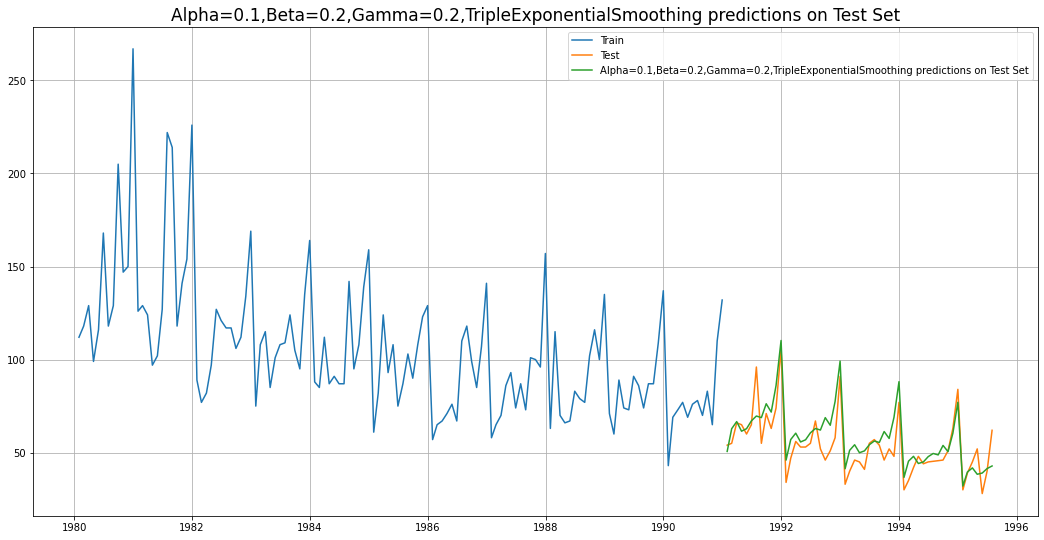

In [951]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set', fontsize=17);
plt.grid();

In [857]:
temp_resultsDf_tes = pd.DataFrame({'Test RMSE': [resultsDf_m2.sort_values(by=['Test RMSE'],ascending=True).values[0][4]]}
                              ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2:TripleExponentialSmoothing'])

round(temp_resultsDf_tes,3)

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2:TripleExponentialSmoothing",9.641


In [858]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_tes,3)])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


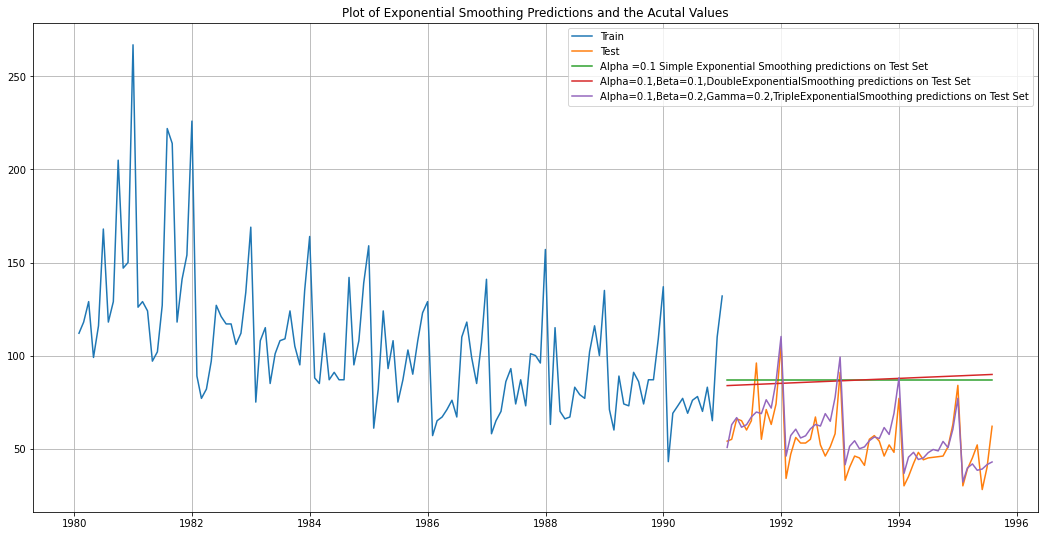

In [676]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [677]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2:TripleExponentialSmoothing",9.641
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
RegressionOnTime,15.269
"Alpha=0,Beta=0 :DoubleExponentialSmoothing",15.569
"Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing",21.155
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Checking Stationarity

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

$\alpha$ = 0.05

In [859]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

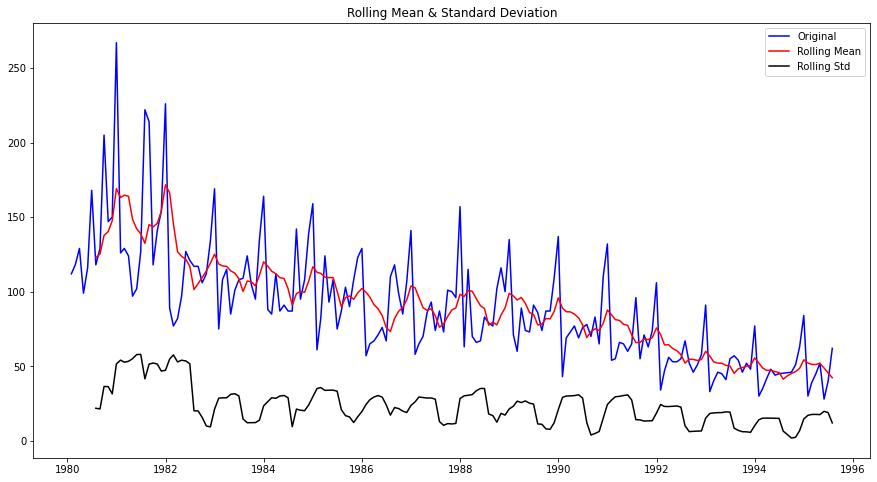

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [679]:
test_stationarity(df_rose['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

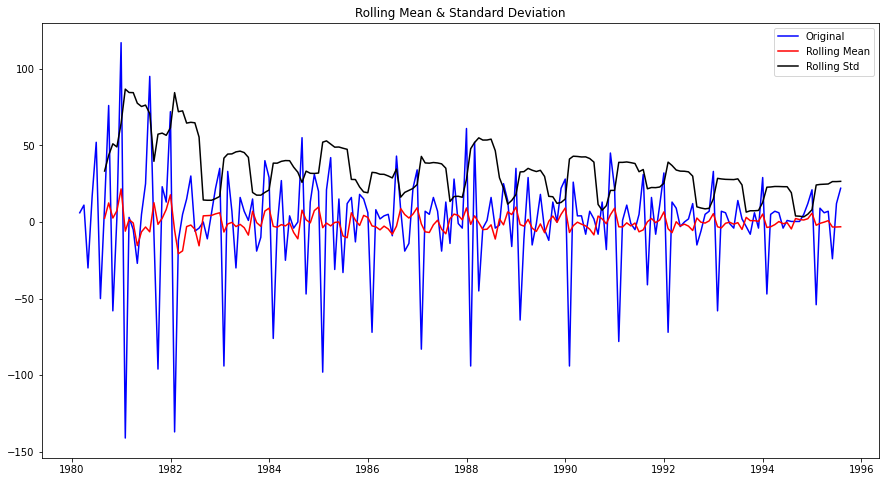

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [860]:
test_stationarity(df_rose['Rose'].diff().dropna())

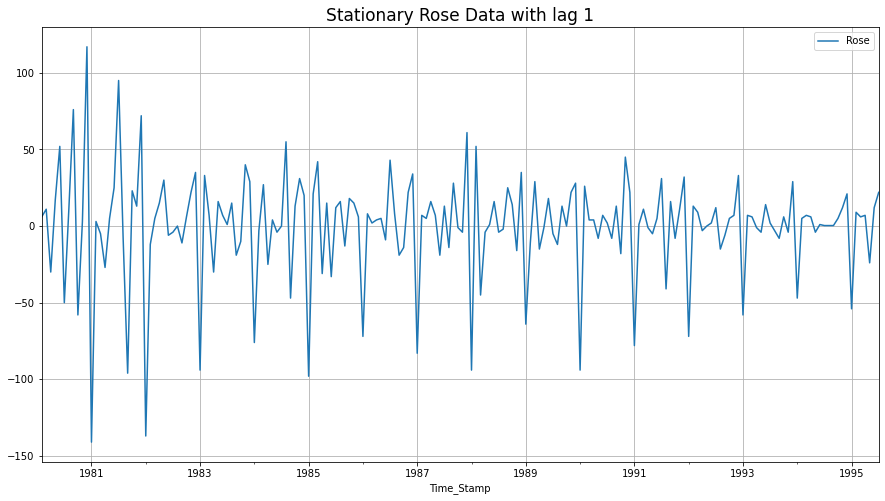

In [452]:
df_rose.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [861]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

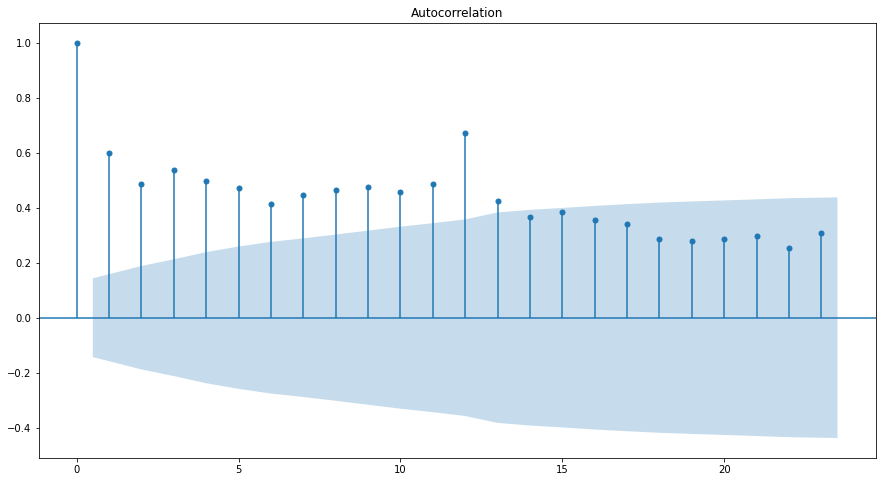

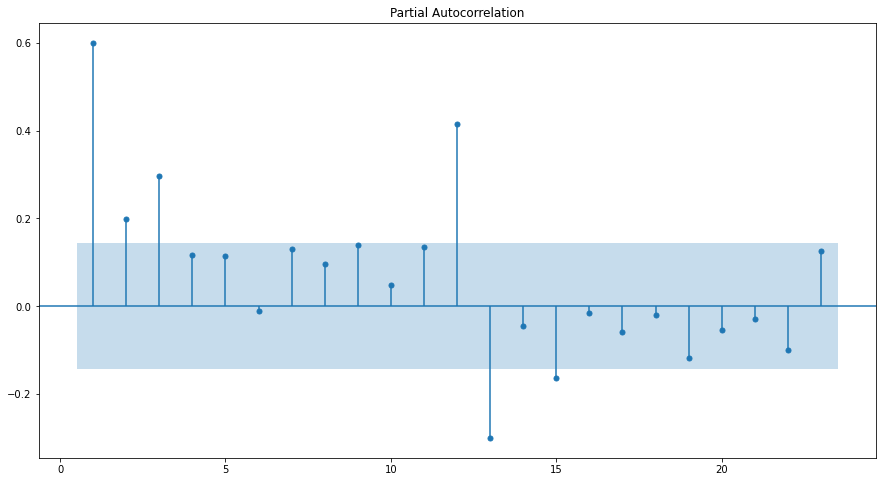

In [454]:
plot_acf(df_rose,alpha=0.05);
plot_pacf(df_rose,zero=False,alpha=0.05,method='ywmle');

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Check for stationarity of the Training Data Time Series

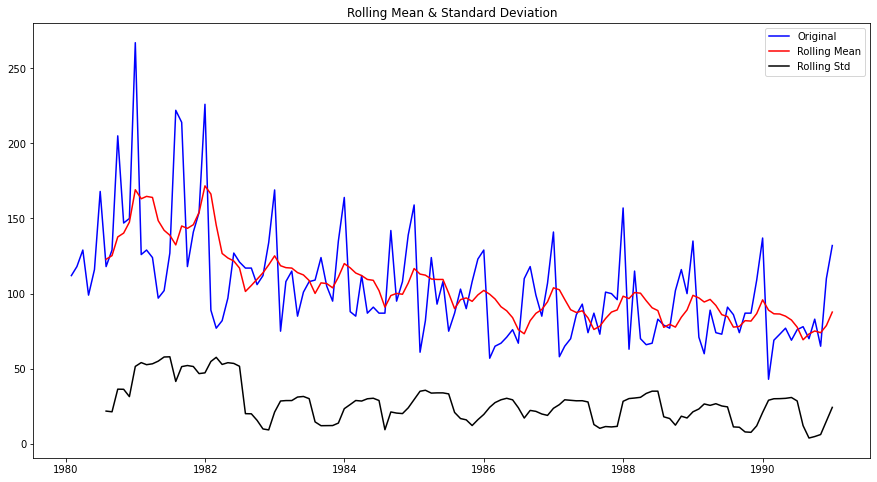

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [745]:
test_stationarity(train['Rose'])

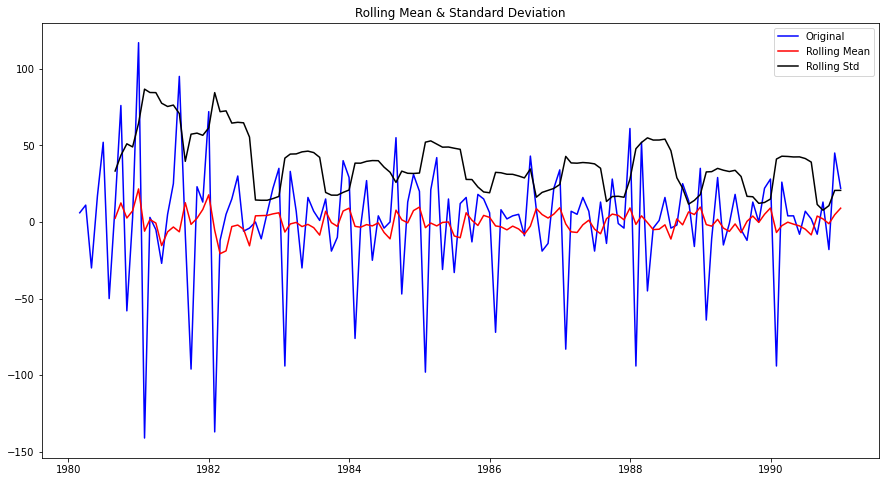

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [862]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [303]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Building an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [863]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [864]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [865]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535793
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.507862186851
ARIMA(2, 1, 2) - AIC:1281.8707222264593


In [866]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722


In [867]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Thu, 17 Mar 2022   AIC                           1279.672
Time:                        23:47:19   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

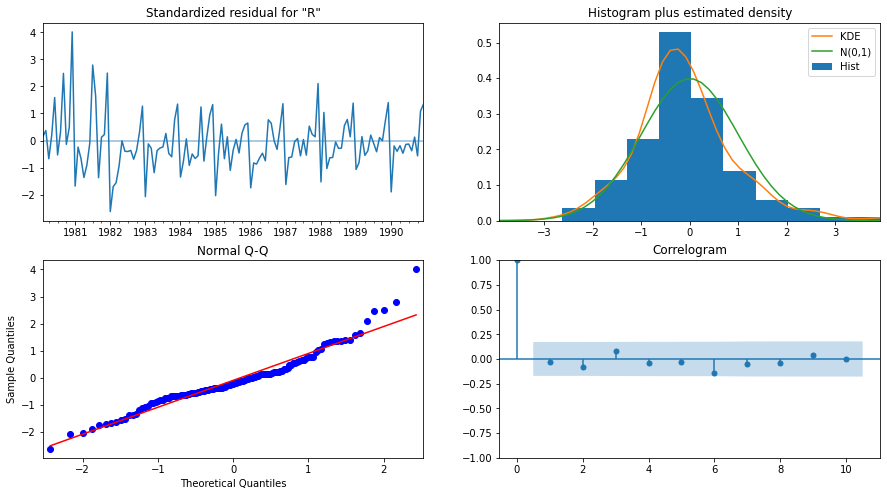

In [752]:
results_auto_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model.

In [868]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [869]:
from sklearn.metrics import  mean_squared_error
rmse1 = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse1)

37.30647971647372


In [870]:
rmse_arima = pd.DataFrame({'Test RMSE': round(rmse1,3)}
                              ,index=['ARIMA(0,1,2)based on AIC values'])

rmse_arima #36.777

,Test RMSE
"ARIMA(0,1,2)based on AIC values",37.306


In [871]:
resultsDf = pd.concat([resultsDf, rmse_arima])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### Building an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model

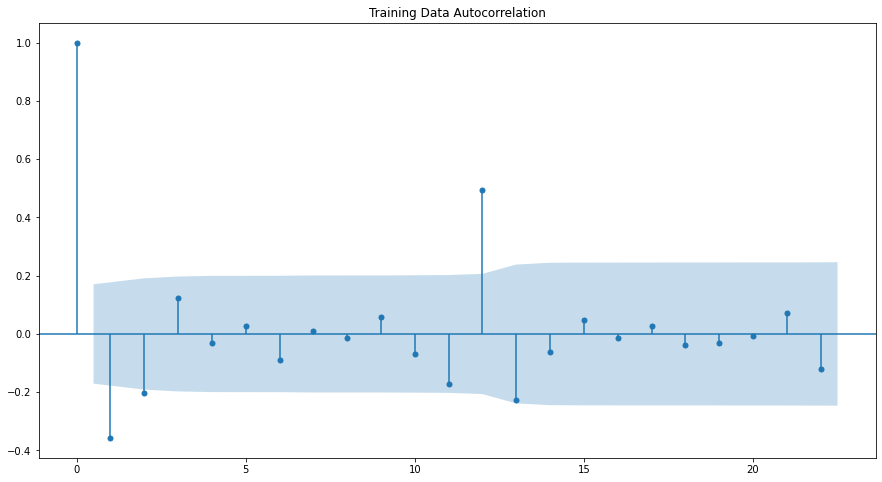

In [319]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We see that there can be a seasonality of 12. We will run auto SARIMA models by setting seasonality as 12.

In [872]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [873]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [874]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869384913
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754179
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945536
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383756
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094632
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483305353
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198826402149
SARIMA(0, 1, 2)x(0, 0, 0

In [875]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686896
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [876]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2,0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Thu, 17 Mar 2022   AIC                            887.938
Time:                                    23:58:01   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.757     -0.004      0.996    -372.760     371.074
ma.L2         -0.1573     29.812   

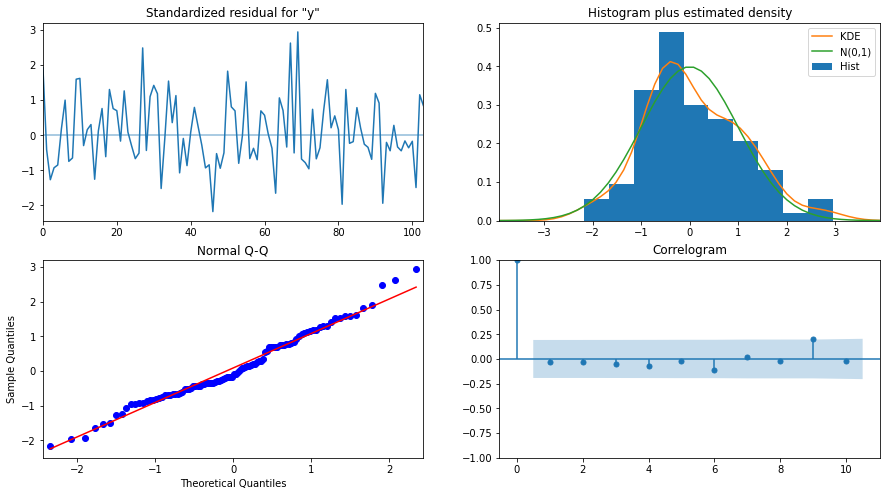

In [326]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [877]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [878]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928501,31.647976,94.086550
1,70.541190,16.147658,38.892361,102.190019
2,77.356410,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396222


In [879]:
rmse2 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse2)

26.928361609619667


In [880]:
rmse_sarima = pd.DataFrame({'Test RMSE': round(rmse2,3)}
                              ,index=['SARIMA(0,1,2)(2,0,2,12) based on AIC value'])

rmse_sarima

,Test RMSE
"SARIMA(0,1,2)(2,0,2,12) based on AIC value",26.928


In [881]:
resultsDf = pd.concat([resultsDf, rmse_sarima])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

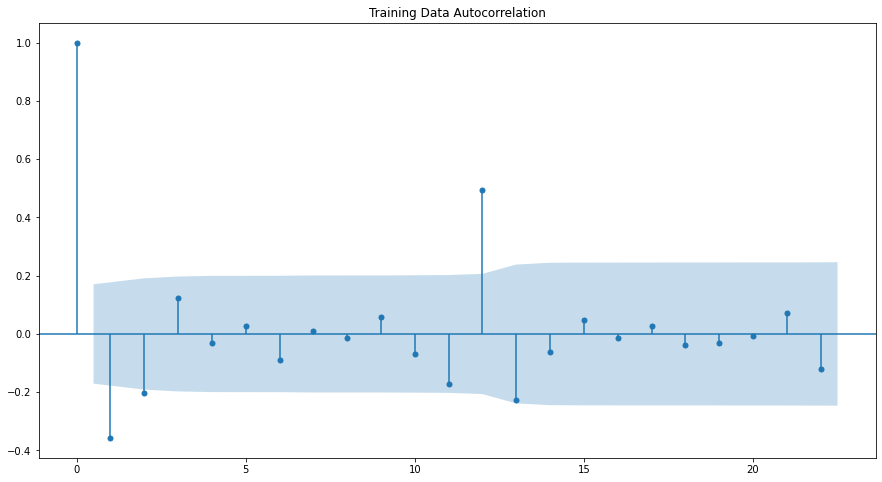

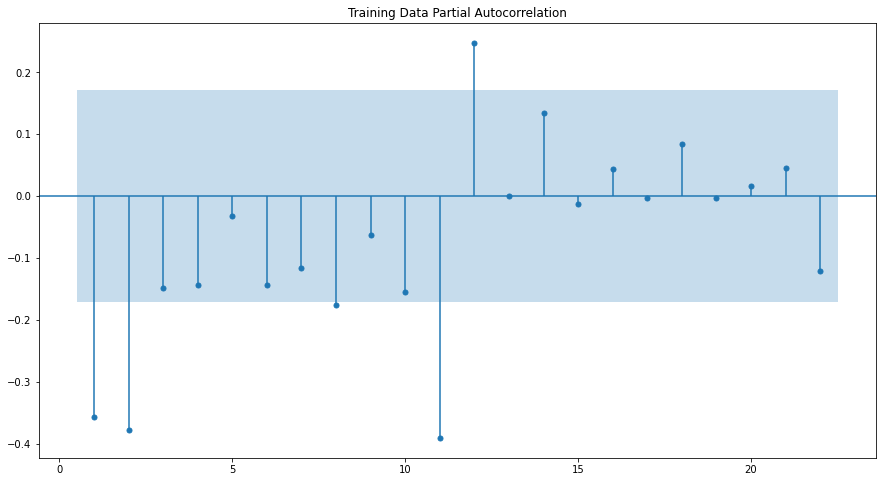

In [882]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [883]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Thu, 17 Mar 2022   AIC                           1281.871
Time:                        23:58:23   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

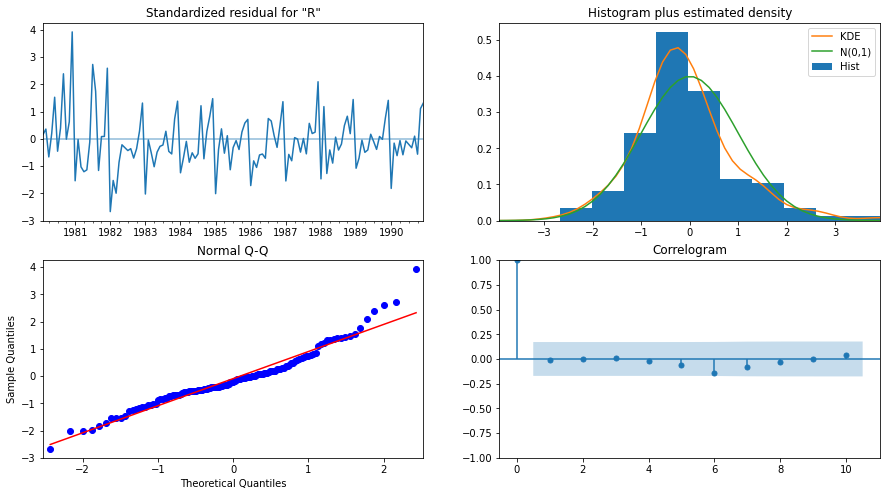

In [952]:
results_manual_ARIMA.plot_diagnostics();

In [884]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [885]:
rmse3 = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse3)

36.8711966129878


In [887]:
rmse_manual_arima = pd.DataFrame({'Test RMSE': round(rmse3,3)}
                              ,index=['ARIMA(2,1,2)based on ACF & PACF values'])

rmse_manual_arima

,Test RMSE
"ARIMA(2,1,2)based on ACF & PACF values",36.871


In [888]:
resultsDf = pd.concat([resultsDf, rmse_manual_arima])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

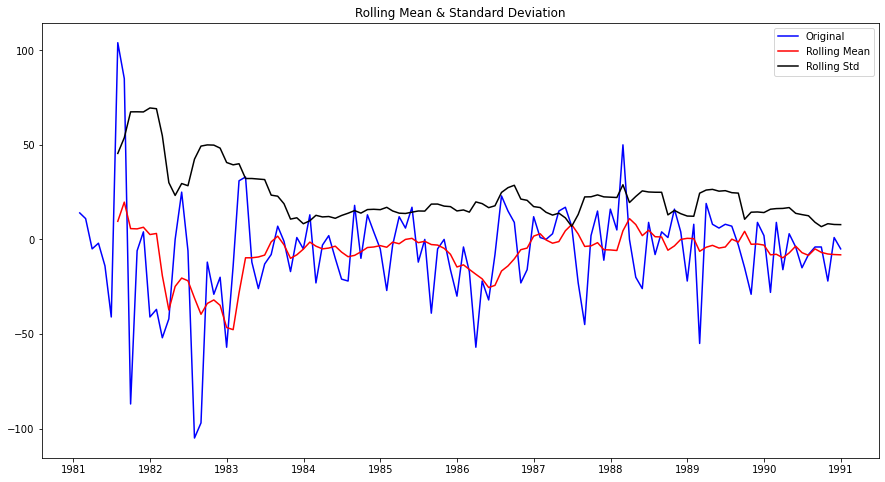

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [889]:
test_stationarity((train['Rose'].diff(12).dropna()))

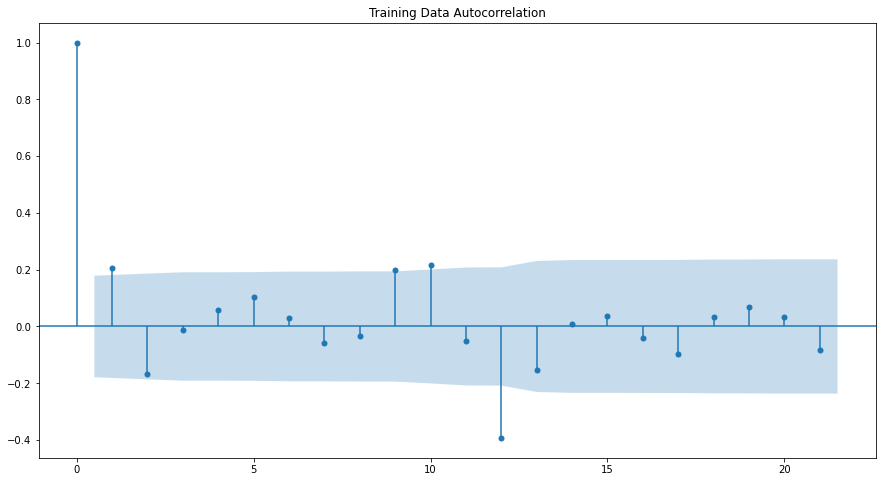

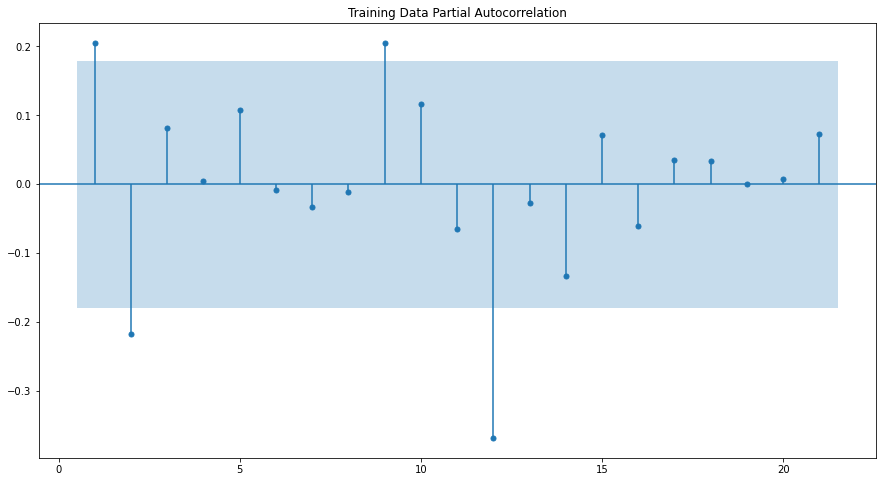

In [890]:
plot_acf(train.diff(12).dropna(),title='Training Data Autocorrelation',missing='drop');
plot_pacf(train.diff(12).dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.

The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1

In [891]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -441.189
Date:                              Thu, 17 Mar 2022   AIC                            898.378
Time:                                      23:58:51   BIC                            919.610
Sample:                                           0   HQIC                           906.982
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4772      0.305      1.565      0.118      -0.121       1.075
ar.L2         -0.16

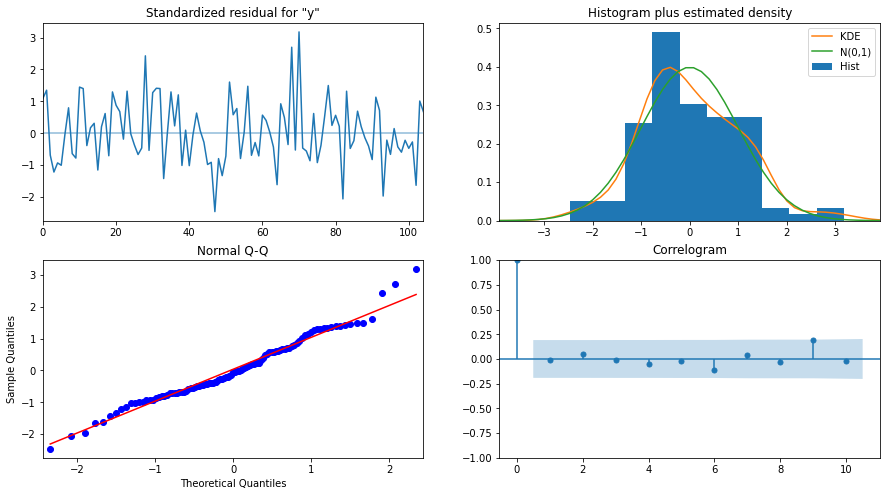

In [342]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [892]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [893]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,63.184121,15.846990,32.124593,94.243650
1,67.518949,16.046319,36.068742,98.969157
2,77.724938,16.101126,46.167311,109.282565
3,77.269078,16.129080,45.656662,108.881494
4,73.696201,16.129036,42.083872,105.308530


In [894]:
rmse4 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse4)

28.221594566518156


In [895]:
rmse_manual_sarima = pd.DataFrame({'Test RMSE': round(rmse4,3)}
                              ,index=['SARIMA(2,1,2)(2,0,1,12)based on ACF & PACF values'])

rmse_manual_sarima

,Test RMSE
"SARIMA(2,1,2)(2,0,1,12)based on ACF & PACF values",28.222


In [896]:
resultsDf = pd.concat([resultsDf, rmse_manual_sarima])
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [897]:
resultsDf

,Test RMSE
RegressionOnTime,15.269
NaiveModel,79.719
SimpleAverageModel,53.461
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
Alpha=0.099:SimpleExponentialSmoothing,36.796
"Alpha=0.1,SimpleExponentialSmoothing",36.828
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569


In [953]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2:TripleExponentialSmoothing",9.641
2pointTrailingMovingAverage,11.529
4pointTrailingMovingAverage,14.451
6pointTrailingMovingAverage,14.566
9pointTrailingMovingAverage,14.728
RegressionOnTime,15.269
"Alpha=0.00013,Beta=0 :DoubleExponentialSmoothing",15.569
"Alpha=0.064,Beta=0.053,Gamma=0,TripleExponentialSmoothing",21.155
"SARIMA(0,1,2)(2,0,2,12) based on AIC value",26.928
"SARIMA(2,1,2)(2,0,1,12)based on ACF & PACF values",28.222


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 𝛼 = 0.1, 𝛽 = 0.2 and 𝛾 = 0.2.

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set

In [898]:
fullmodel = ExponentialSmoothing(df_rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.2)

In [899]:
RMSE_fullmodel = metrics.mean_squared_error(df_rose['Rose'],fullmodel.fittedvalues,squared=False)

print('RMSE for fullmodel:',round(RMSE_fullmodel,3))

RMSE for fullmodel: 17.404


In [722]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel.forecast(steps=len(test))

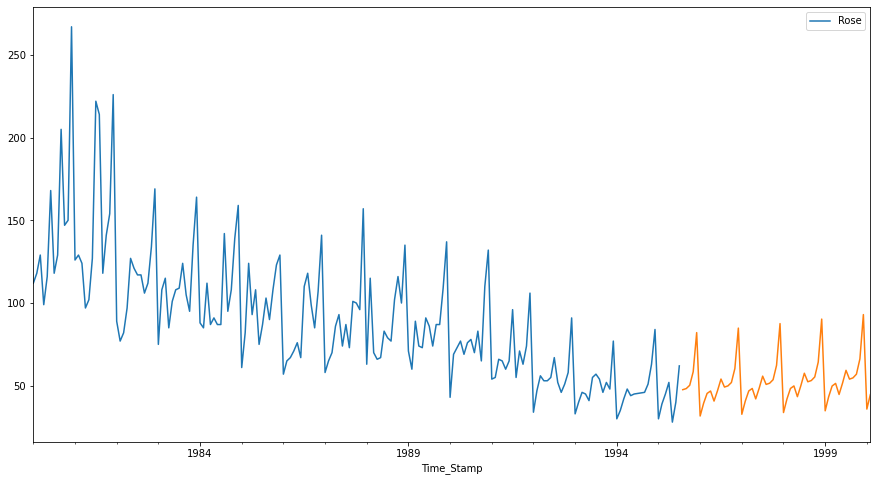

In [723]:
df_rose.plot()
prediction_2.plot();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [724]:
prediction_3 = fullmodel.forecast(steps=12)
prediction_3

1995-08-31    47.607992
1995-09-30    48.284483
1995-10-31    50.279659
1995-11-30    58.461229
1995-12-31    82.116597
1996-01-31    31.696347
1996-02-29    39.431810
1996-03-31    45.360027
1996-04-30    46.803004
1996-05-31    40.722235
1996-06-30    46.994555
1996-07-31    54.041102
Freq: M, dtype: float64

Text(0.5, 1.0, 'Plot of full model forecast')

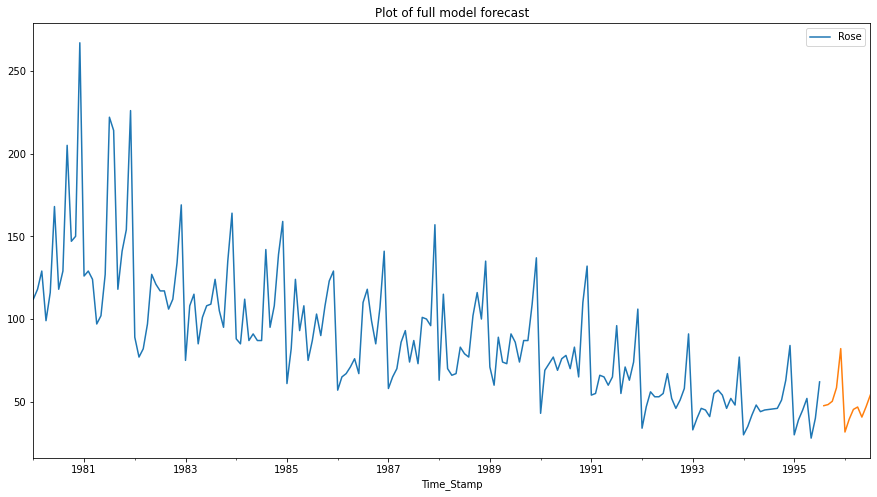

In [956]:
df_rose.plot()
prediction_3.plot();
plt.title('Plot of full model forecast')

In [955]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_3 - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction_3,
                          'upper_ci': prediction_3 + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_2_df

,lower_CI,prediction,upper_ci
1995-08-31,13.422360,47.607992,81.793624
1995-09-30,14.098851,48.284483,82.470114
1995-10-31,16.094027,50.279659,84.465291
1995-11-30,24.275597,58.461229,92.646861
1995-12-31,47.930965,82.116597,116.302229
1996-01-31,-2.489284,31.696347,65.881979
1996-02-29,5.246178,39.431810,73.617442
1996-03-31,11.174395,45.360027,79.545658
1996-04-30,12.617372,46.803004,80.988636
1996-05-31,6.536603,40.722235,74.907866


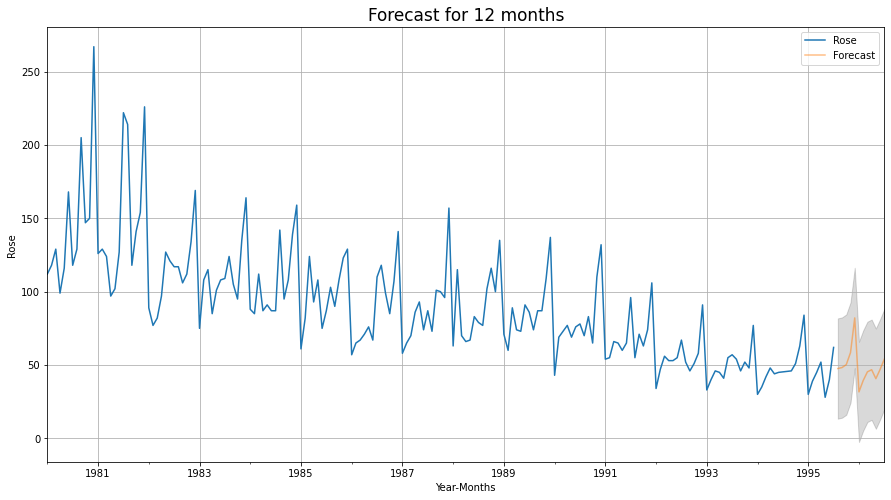

In [959]:
# plot the forecast along with the confidence band

axis = df_rose.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.title('Forecast for 12 months',fontsize=17);
plt.grid()
plt.show()
